<a href="https://colab.research.google.com/github/taesangeom/SK-T-Academy/blob/main/Coding_Test/24_%EC%B5%9C%EB%8B%A8%EA%B1%B0%EB%A6%AC_%ED%83%9D%EC%8B%9C%ED%95%A9%EC%8A%B9_%EC%B9%B4%EC%B9%B4%EC%98%A4_L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ref: https://school.programmers.co.kr/learn/courses/30/lessons/72413?language=python3
# ==> 택시 합승 요금 문제

In [ ]:
# 지도상에서 최단거리 문제와 유사한 세팅!!
# ==> 거리가 "요금" 변경!!
# ==> 출발점에서 최소거리만 구하면 되는데,,
#     같이 타고오는 구간 + 따로따로가는 구간!!!
#     : 뭔가 파트가 나눠져서 해야하는구나!!!!!!!!
#     (출발부터 따로 가는게 저렴하면, 합승 안 해도 됨!)


In [ ]:
# 입력 처리 : [4,1,2] <--> [4,1,2]. [1,4,2] (도시,도시,거리)
graph[
    [],
    [(4,2)], #(도시,거리)
    [],
    [],
    [(1,2)]
]

In [ ]:
#만약 같이 가다가 어느 지점에서 헤어졌다면, 그 지점 시작지점으로 다시 최소비용 계산

# ==> 최대한 공통 최단거리 탐색으로 처리!!!! (합승용금//헤어져서 각가 집 요금)
#     함수 : 지도//출발점//각 지점별 최소거리 계산결과
# -> 다익스트라 알고리즘

#각점에서 한번씩 bye-bye 하는 지를 가정하고 초기점 지정하여 각각 다익스트라 알고리즘 다 돌려야함.

# 큰 접근 방향
# Step1) 지도 처리 해야하고
# Step2) s에 대한 출발점에 대한 입력정보를 바탕으로 --> 각 지점별 최소요금 계산
#        [ 위의 그림 상 왼쪽 그림에 대한 각 도시별 최소요금 ]
# step3) 모든 도시에서 bye-bye를 할 수 있으니, 다 체크!!!!
#         => 그 도시에서 bye-bye에 대한 a,b 까지의 최소요금 계산
#        -> i번째 도시에서 bye bye 한다면,
#            i번째 도시를 출발해서 ==> 모든 지점상 최소요금을 계산!!!
#            [ 위의 그림 상 오른쪽 그림에 대한 각 색상별 요금 계산]
#             -- i번째에서 bye-bye 전체 요금 계산
#                (요금 = 왼쪽 상 요금[1개] + 오른쪽 상 요금[2개])
#                 이 중에서 최소 요금을 모니터링!!!!!!
# ===> 남은 최소 요금을 return : 출력!!!!

# ++++ 출발점에 대한 각 지점별 최소요금을 구하는(알고리즘!!!)일 계속 반복!!
# -> 하는 일이 동일하니 함수화하자

In [ ]:
# 지금까지 한 heapq 이용방식 스타일 최대로 그대로 구현

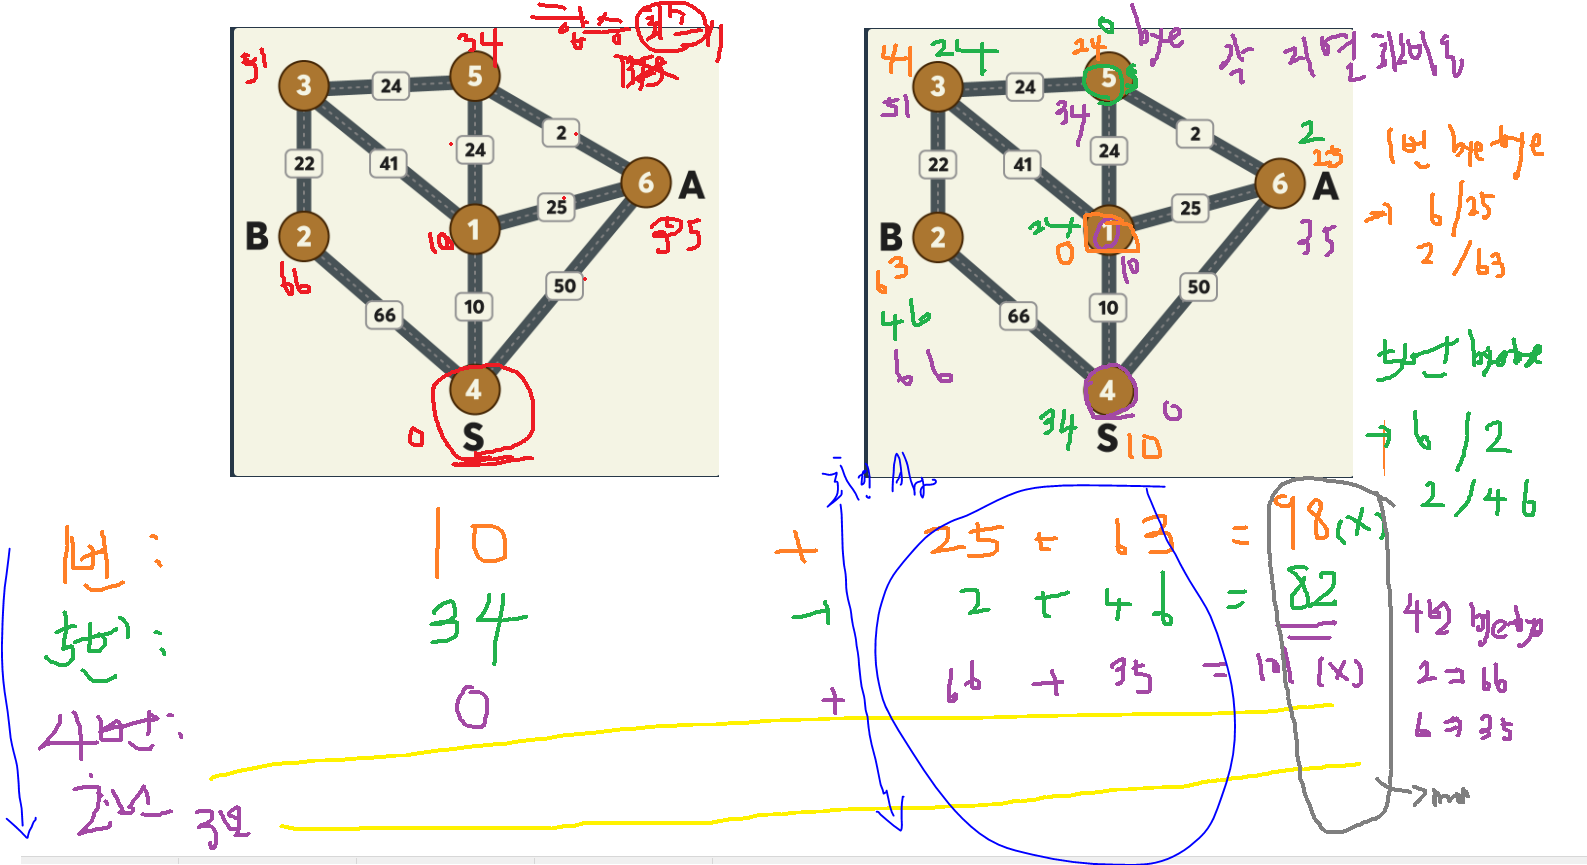

In [6]:
#필요 패키지
import heapq

INF=float("inf")

def solution(n, s, a, b, fares):

    #입력부분 처리 - 거리,지도 코드화
    graph=[[] for i in range(n+1)] # 지도  [도시,거리]
    distance=[INF for i in range(n+1)] # 도시의 거리 세팅
    for fare in fares:
        graph[fare[0]].append((fare[1],fare[2]))
        graph[fare[1]].append((fare[0],fare[2]))
    # step2) 주어진 입력 s에서 출발할 때, 모든 도시에 이르는 최소요금 계산!!!
    #        ==> 최단거리 알고리즘 : 다익스트라알고리즘 --> 함수콜

    #함수 시작 __________________________
    def dijkstra(start,distance, graph):
        q=[] # heapq
        distance[start]=0
        heapq.heappush(q,(0,start)) # 시작점 초기화, heapq 를 위해 (거리,도시) 순으로 세팅
        while q:
            dist,now=heapq.heappop(q) #할일 뽑기
            if distance[now]<dist:
                continue
            else:
                for i in graph[now]: #연결된 도시들 찾아서 시뮬레이션 비용 탐색
                    cost=dist+i[1] #예상거리
                    if cost<distance[i[0]]: # 더 짧다면
                        distance[i[0]]=cost #비용갱신
                        heapq.heappush(q,(cost,i[0]))
        return distance
    # 함수파트 끝 ___________________________

    distance=dijkstra(s,distance,graph) # 위 그림상 왼쪽 요금표

     # step3) 각 지점에서 환승을 끝내고 각자의 집으로 갈 때 : 오른쪽 그림

    min_fare = INF #이게 답이다. -> 최소요금
    for start_node in range(1,n+1): # 도시별로 롤링 하면서 돌린다
        # 모든 n개의 도시들을 출발점으로 해서,,,각 도시별로 최소요금 계산!!!
        # ==> 위의 오른쪽 그림에 대한 여러 색의 요금
        # : 그 지점에서 서로 bye-bye 하고, 각 집으로 갈 때 필요한 요금
        dist = [ INF for _ in range(n+1)]  #다시 시작점 초기화
        dist = dijkstra(start_node,dist, graph) # 각자 시작점으로 다시 다익스트라 적용
        cost=distance[start_node]+dist[a]+dist[b]   #코스트합산
        min_fare=min(min_fare,cost) # 계속 비교해서, 작은 것이 정답임

    return min_fare

In [7]:
solution(6,4,6,2,[[4, 1, 10], [3, 5, 24], [5, 6, 2], [3, 1, 41], [5, 1, 24], [4, 6, 50], [2, 4, 66], [2, 3, 22], [1, 6, 25]])

82